## ML_SP22_RE_4 
### Due Date: 03/25 before Mid-night
### Linear Regression, One-hot encoding and K-fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### This review exercise is on building a Linear Regression model, practice k-fold cross validation and one-hot encoding 

### Part 1: Build a Linear Regression model to predict house price

#### First load the data set

In [2]:
housing = pd.read_csv(r"C:\Users\redwa\OneDrive\Documents\Year 3 Semester 2\CSCI 381 - Machine Learning\USA_housing.csv")
housing.head()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
housing.describe()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


***We will skip EDA for this dataset***

***Follow the standard proper way of building a model and in particular,***
1. Use Scatter plots and correlation to identify the most important variable that can explain the house price.
2. Build a one-factor Linear Regression model using that variable
3. Print out the model performance metrics (MSE, R-square).
4. Plot your best-fitted line on top of the data.
5. Perform a 10-fold cross validation and determine if your model pass the cross-validation.
6. Add one addition variable to build a 2-factors model. Explain your reason why you choose that variable.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

***Type your code here***

In [5]:
# show your code here
numerical_features = ['Income', 'HouseAge', 'NumberOfRooms', 'AreaNumberOfBedrooms', 'Population','Price']
categorical_features = ['Address']
numerical_df = housing[numerical_features]
numerical_df.corr()

,Income,HouseAge,NumberOfRooms,AreaNumberOfBedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
HouseAge,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
NumberOfRooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
AreaNumberOfBedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


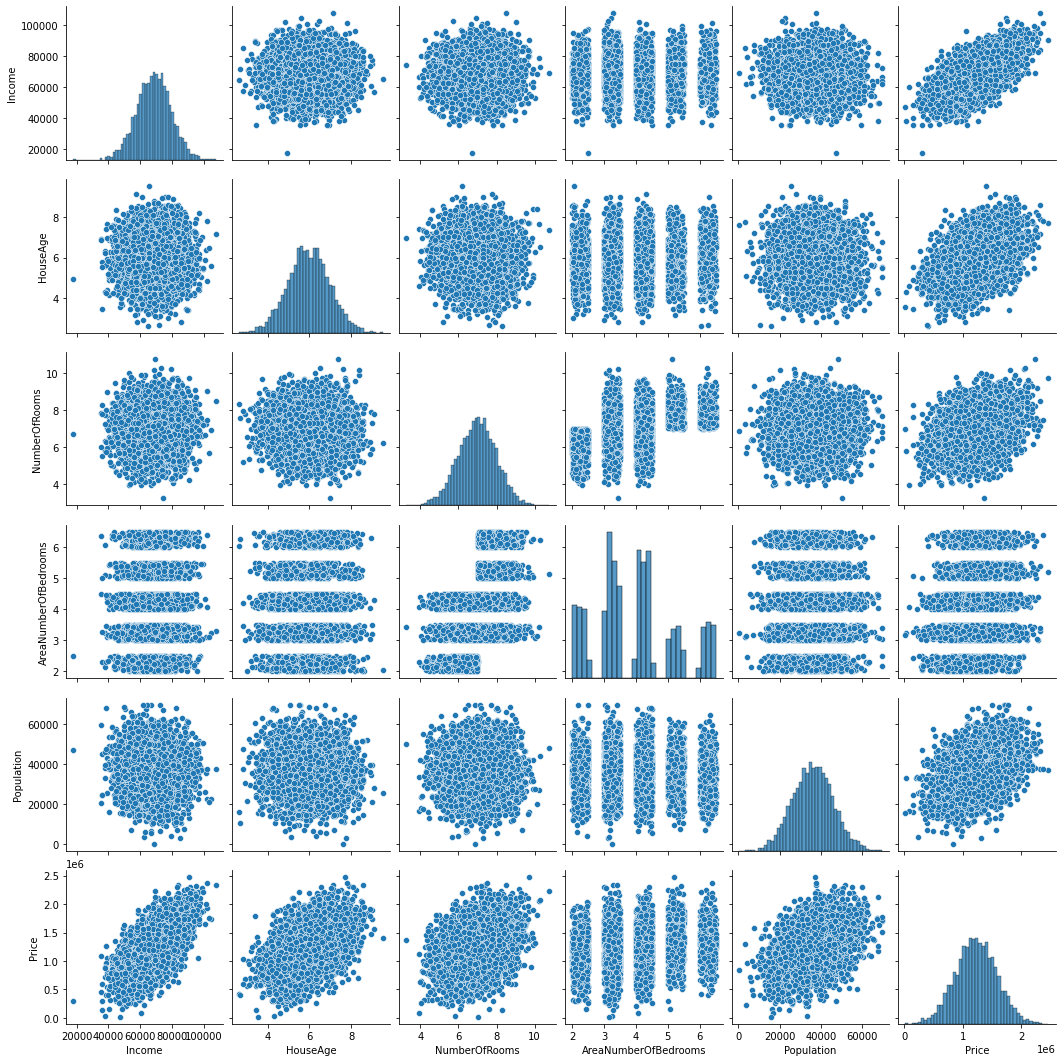

In [6]:
sns.pairplot(numerical_df)

<AxesSubplot:xlabel='Income', ylabel='Price'>

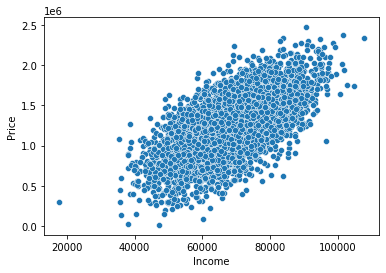

In [7]:
sns.scatterplot(x='Income', y='Price', data=numerical_df)

In [8]:
X = numerical_df['Income'].values.reshape(-1, 1)
Y = numerical_df['Price'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [9]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Squared Error: 74084394120.77266
R-squared: 0.4006059806785851


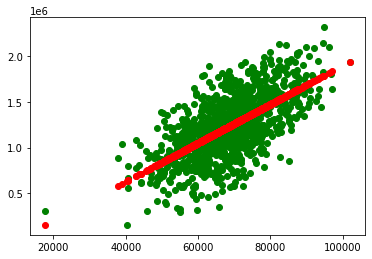

In [10]:
plt.scatter(X_test, Y_test,  color='green')
plt.scatter(X_test, Y_pred, color='red', linewidth=1)
plt.show()

In [11]:
import random
for i in range(10):
    print(random.randint(1, 1000))

444
298
540
374
60
88
294
297
39
297


In [12]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

Trial 0, R-squared: 0.41296826609915294,  Slope: [[21.15117294]], Intercept: [-219272.57201518],  
Trial 1, R-squared: 0.4157468733621905,  Slope: [[21.16392568]], Intercept: [-222739.08559669],  
Trial 2, R-squared: 0.40306341744839314,  Slope: [[21.15410291]], Intercept: [-222491.97067194],  
Trial 3, R-squared: 0.394433391876705,  Slope: [[21.06982435]], Intercept: [-212563.69632975],  
Trial 4, R-squared: 0.42986908589877515,  Slope: [[21.18330978]], Intercept: [-217907.24861816],  
Trial 5, R-squared: 0.4289236771628997,  Slope: [[20.91113122]], Intercept: [-202969.36663539],  
Trial 6, R-squared: 0.41018802199226867,  Slope: [[20.98054342]], Intercept: [-209042.76092115],  
Trial 7, R-squared: 0.43403288695921827,  Slope: [[20.80322704]], Intercept: [-193573.86309061],  
Trial 8, R-squared: 0.4407066877269312,  Slope: [[20.80828081]], Intercept: [-196008.51001465],  
Trial 9, R-squared: 0.4212266729254225,  Slope: [[21.22900995]], Intercept: [-224722.58571647],  


In [13]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.407520
1,1,0.428154
2,2,0.401269
3,3,0.394582
4,4,0.397981
5,5,0.402344
6,6,0.384368
7,7,0.418442
8,8,0.433585
9,9,0.396823


<AxesSubplot:xlabel='trial'>

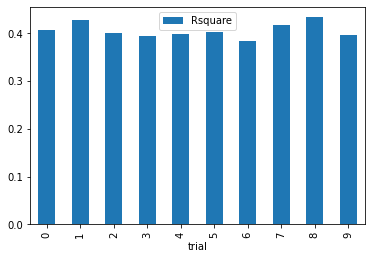

In [14]:
rdf.plot.bar(x='trial', y='Rsquare')

In [15]:
print(rdf['Rsquare'].mean())

0.4065069428180128


***Pick an additional variable to build a two-factors linear regression model***


***I choose HouseAge for the second variable because it has the second highest correlation with house prices***


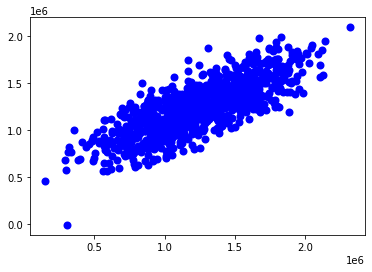

R-squared: 0.6111416177920193


In [16]:
# type your code here
X = housing[['Income','HouseAge']].values.reshape(-1, 2)
Y = housing['Price'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

housing[['Price', 'HouseAge']].head()

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred, color='blue', linewidth=2)

plt.show()
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

### Now load the Salary data set

In [17]:
# Load the dataset
df = pd.read_csv(r"C:\Users\redwa\OneDrive\Documents\Year 3 Semester 2\CSCI 381 - Machine Learning\Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [18]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [19]:
df.isnull().any() 
# or
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

In [20]:
# we can simply drop them
df.dropna(inplace=True)
df.shape

(399, 6)

<AxesSubplot:xlabel='Salary'>

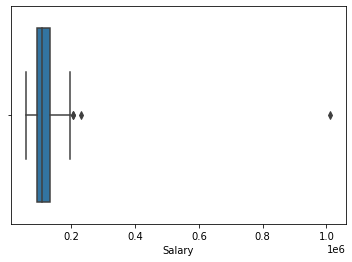

In [21]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

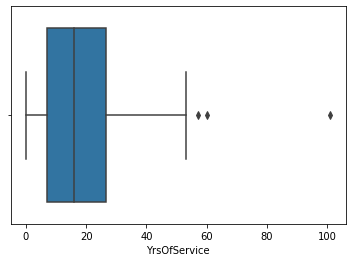

In [22]:
sns.boxplot(x=df['YrsOfService'])

In [23]:
# remove un-reasonable data, 
df = df[df['YrsOfService'] < 70]
df = df[df['Salary'] < 400000]
df.shape

(397, 6)

<AxesSubplot:xlabel='Salary'>

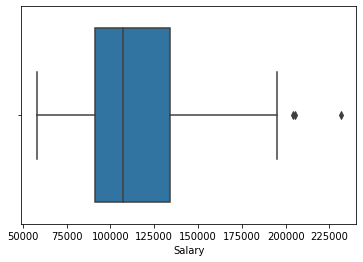

In [24]:
sns.boxplot(x=df['Salary'])

<AxesSubplot:xlabel='YrsOfService'>

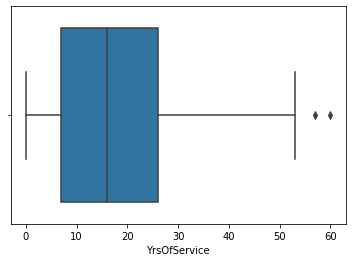

In [25]:
sns.boxplot(x=df['YrsOfService'])

In [26]:
df.shape

(397, 6)

In [27]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


***In general it is a good idea to reset the index after we remove rows***

In [28]:
df = df.reset_index()
df.tail()

,index,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
392,398,Prof,A,33.0,30.0,Male,103106
393,399,Prof,A,31.0,19.0,Male,150564
394,400,Prof,A,42.0,25.0,Male,101738
395,401,Prof,A,25.0,15.0,Male,95329
396,402,AsstProf,A,8.0,4.0,Male,81035


### Now we are ready to use this data to build model ###

1. Separate numerical features from categorical features
2. Build a two-factors model to predict the Salary with both YrsSincePhd and YrsOfService as its correlation is higher
3. Check if the model pass cross validation
4. Use one-hot encoding to include the Rank, Sex and Discipline along with the above numerical variable
to build a second model.
5. Comment on if the model improve or not

***Type your code here***

In [170]:
# ignore longitude and latitude
numerical_features = ['YrsSincePhd', 'YrsOfService', 'Salary']
categorical_features1 = ['Rank']
categorical_features2 = ['Discipline']
categorical_features3 = ['Sex']

numerical_df = df[numerical_features]
numerical_df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


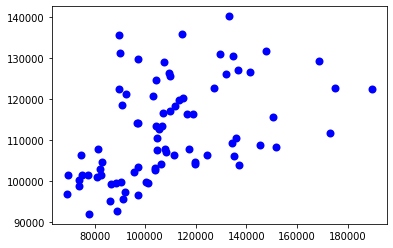

R-squared: 0.21148701943939108


In [171]:
X = df[['YrsSincePhd','YrsOfService']].values.reshape(-1, 2)
Y = df['Salary'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

housing[['Price', 'HouseAge']].head()

model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred, color='blue', linewidth=2)

plt.show()
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Trial 0, R-squared: 0.13860535892260994,  Slope: [[1596.67322003 -628.55915854]], Intercept: [89059.47201563],  
Trial 1, R-squared: 0.2618429702254358,  Slope: [[1553.78019868 -632.72485291]], Intercept: [90080.99195106],  
Trial 2, R-squared: 0.13008843895811728,  Slope: [[1709.16920026 -771.8414405 ]], Intercept: [89160.64528525],  
Trial 3, R-squared: 0.14670009315299204,  Slope: [[1198.36101307 -205.04379993]], Intercept: [91854.6761247],  
Trial 4, R-squared: 0.13018207708629026,  Slope: [[1484.96572552 -488.54674254]], Intercept: [89522.98880936],  
Trial 5, R-squared: 0.2999658241153539,  Slope: [[1498.32079417 -668.67276483]], Intercept: [91897.42778825],  
Trial 6, R-squared: 0.2079312530144929,  Slope: [[1224.39555085 -261.99995158]], Intercept: [90855.87980451],  
Trial 7, R-squared: 0.12631520302587051,  Slope: [[1578.43525098 -634.78125402]], Intercept: [90519.31607749],  
Trial 8, R-squared: 0.08614308912909818,  Slope: [[1569.25965244 -582.17070362]], Intercept: [89234.

<AxesSubplot:xlabel='trial'>

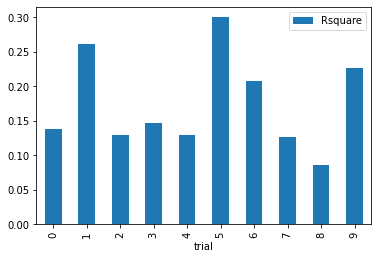

In [172]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [189]:
categorical_df = df[categorical_features1]
categorical_df.head()

,Rank
0,Prof
1,Prof
2,AsstProf
3,Prof
4,Prof


In [190]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(categorical_df)

onehot_df = pd.DataFrame(housing_cat_1hot.toarray(), columns = cat_encoder.categories_)
combine_df = pd.concat([numerical_df[['YrsSincePhd', 'YrsOfService','Salary']], onehot_df ], axis=1)
combine_df.head()

,YrsSincePhd,YrsOfService,Salary,"(AssocProf,)","(AsstProf,)","(Prof,)"
0,19.0,18.0,139750,0.0,0.0,1.0
1,20.0,16.0,173200,0.0,0.0,1.0
2,4.0,3.0,79750,0.0,1.0,0.0
3,45.0,39.0,115000,0.0,0.0,1.0
4,40.0,41.0,141500,0.0,0.0,1.0


In [192]:
categorical_df = df[categorical_features2]

In [193]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(categorical_df)

onehot_df = pd.DataFrame(housing_cat_1hot.toarray(), columns = cat_encoder.categories_)
combine_df = pd.concat([numerical_df[['YrsSincePhd', 'YrsOfService','Salary']], onehot_df ], axis=1)
combine_df.head()

,YrsSincePhd,YrsOfService,Salary,"(A,)","(B,)"
0,19.0,18.0,139750,0.0,1.0
1,20.0,16.0,173200,0.0,1.0
2,4.0,3.0,79750,0.0,1.0
3,45.0,39.0,115000,0.0,1.0
4,40.0,41.0,141500,0.0,1.0


In [194]:
categorical_df = df[categorical_features3]

In [195]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(categorical_df)

onehot_df = pd.DataFrame(housing_cat_1hot.toarray(), columns = cat_encoder.categories_)
combine_df = pd.concat([numerical_df[['YrsSincePhd', 'YrsOfService','Salary']], onehot_df ], axis=1)
combine_df.head()

,YrsSincePhd,YrsOfService,Salary,"(Female,)","(Male,)"
0,19.0,18.0,139750,0.0,1.0
1,20.0,16.0,173200,0.0,1.0
2,4.0,3.0,79750,0.0,1.0
3,45.0,39.0,115000,0.0,1.0
4,40.0,41.0,141500,0.0,1.0
